# Serie 10

## Aufgabe 10.1

Der Fachartikel _Compression of Single-Wall Corrugated Containers Using Fixed and Floating Test Platens_ (J. Testing and Evaluation, 1992: 318-320) beschreibt ein Experiment, in dem verschiedene Typen von Container-Hüllen in Bezug auf Druckfestigkeit (lb) verglichen wurden.
```text
Typ Druckfestigkeit

1 655.5 788.3 734.3 721.4 679.1 699.4
2 789.2 772.5 786.9 686.1 732.1 774.8
3 737.1 639.0 696.3 671.7 717.2 727.1
4 535.1 628.7 542.4 559.0 586.9 520.0
```

### a) 
Geben Sie die Daten selber in Python ein, und stellen Sie sie mit Stripcharts und Boxplots dar.

`Python`-Hinweise: Die Daten werden in ein Dataframe mit zwei Spalten eingelesen: eine Spalte mit Druckfestigkeitsangaben und eine Spalte mit Hüllentyp:

```python
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
df=DataFrame({
"Typ": np.repeat(["T1", "T2", "T3", "T4"], [6, 6, 6, 6]),
"Druckfestigkeit" : [655.5, 788.3, 734.3, ..]
})
sns.stripplot(x="Typ", y="Druckfestigkeit", data=df)
plt.xlabel("Typ")
plt.ylabel("Druckfestigkeit")
plt.show()
sns.boxplot(x="Typ", y="Druckfestigkeit", data=df)
plt.xlabel("Typ")
plt.ylabel("Druckfestigkeit")
plt.show()
```

In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
df=DataFrame({
"Typ": np.repeat(["T1", "T2", "T3", "T4"], [6, 6, 6, 6]),
"Druckfestigkeit" : [655.5, 788.3, 734.3, 721.4, 679.1, 699.4, 789.2, 772.5, 786.9, 686.1, 732.1, 774.8, 737.1, 639.0, 696.3, 671.7, 717.2, 727.1, 535.1, 628.7, 542.4, 559.0, 586.9, 520.0]
})

print(df)

sns.stripplot(x="Typ", y="Druckfestigkeit", data=df)
plt.xlabel("Typ")
plt.ylabel("Druckfestigkeit")
plt.show()

sns.boxplot(x="Typ", y="Druckfestigkeit", data=df)
plt.xlabel("Typ")
plt.ylabel("Druckfestigkeit")
plt.show()

   Typ  Druckfestigkeit
0   T1            655.5
1   T1            788.3
2   T1            734.3
3   T1            721.4
4   T1            679.1
5   T1            699.4
6   T2            789.2
7   T2            772.5
8   T2            786.9
9   T2            686.1
10  T2            732.1
11  T2            774.8
12  T3            737.1
13  T3            639.0
14  T3            696.3
15  T3            671.7
16  T3            717.2
17  T3            727.1
18  T4            535.1
19  T4            628.7
20  T4            542.4
21  T4            559.0
22  T4            586.9
23  T4            520.0


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## b)
Wie lautet ein Gruppenmittelmodell passend zum Datensatz und zur Fragestellung? Schätzen Sie die Parameter Ihres Modelles.

Unser Gruppenmittelmodell lautet: $Y_{ij} = \mu + \tau_i + \varepsilon_i$

In [2]:
from statsmodels.formula.api import ols
fit = ols("Druckfestigkeit~Typ", data=df).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Druckfestigkeit   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     25.09
Date:                Sat, 08 Dec 2018   Prob (F-statistic):           5.53e-07
Time:                        16:45:22   Log-Likelihood:                -121.07
No. Observations:                  24   AIC:                             250.1
Df Residuals:                      20   BIC:                             254.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    713.0000     16.793     42.459      0.000     677.971     748.029
Typ[T.T2]     43.9333     23.748      1.850      0.079      -5.605      93.471
Typ[T.T3]    -14.9333     23.748     -0.629      0.537     -64.471      34.605
Typ[T.T4]   -150.9833     23.748     -6.358      0.000    -200.521    -101.445
==============================================================================
Omnibus:                        0.228   Durbin-Watson:                   2.382
Prob(Omnibus):                  0.892   Jarque-Bera (JB):                0.426
Skew:                          -0.014   Prob(JB):                        0.808
Kurtosis:                       2.348   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# c)
Besteht ein Unterschied zwischen den Hüllentypen? Führen Sie einen statistischen Hypothesentest auf dem 5% Niveau durch.

In [3]:
from statsmodels.stats.anova import anova_lm
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
Typ,3.0,127374.754583,42458.251528,25.094289,5.525450e-07
Residual,20.0,33838.975000,1691.948750,NaN,NaN


## Aufgabe 10.2

24 Tiere werden zufällig zu 4 unterschiedlichen Ernährungsdiäten zugeordnet, um den Effekt auf die Blutkoagulationszeit zu untersuchen.

```text
Behandlung   Koagulationszeit
         A   62   60   63   59
         B   63   67   71   64   65   66
         C   68   66   71   67   68   68
         D   56   62   60   61   63   64   63   59
```



### a)
Geben Sie die Daten selber in Python ein, und stellen Sie sie mit Stripcharts und Boxplots dar.

`Python`-Hinweise: Die Daten werden in ein Dataframe mit zwei Spalten eingelesen: eine Spalte mit Druckfestigkeitsangaben und eine Spalte mit Hüllentyp:

```python
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

df=DataFrame({
"Behandlung": np.repeat(["A", "B", "C", "D"], [4, 6, 6, 8]),
"Koagulationszeit" : [62, 60, 63, ..]
})

sns.stripplot(x="Behandlung", y="Koagulationszeit", data=df)
plt.xlabel("Behandlung")
plt.ylabel("Koagulationszeit")
plt.show()

sns.boxplot(x="Behandlung", y="Koagulationszeit", data=df)
plt.xlabel("Behandlung")
plt.ylabel("Koagulationszeit")
plt.show()
```

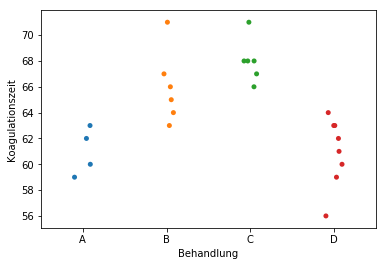

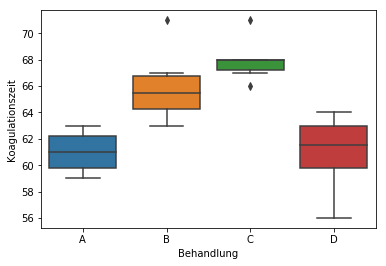

In [4]:
df=DataFrame({
"Behandlung": np.repeat(["A", "B", "C", "D"], [4, 6, 6, 8]),
"Koagulationszeit" : [62, 60, 63, 59, 63, 67, 71, 64, 65, 66, 68, 66, 71, 67, 68, 68, 56, 62, 60, 61, 63, 64, 63, 59]
})

sns.stripplot(x="Behandlung", y="Koagulationszeit", data=df)
plt.xlabel("Behandlung")
plt.ylabel("Koagulationszeit")
plt.show()

sns.boxplot(x="Behandlung", y="Koagulationszeit", data=df)
plt.xlabel("Behandlung")
plt.ylabel("Koagulationszeit")
plt.show()

### b)

Berechnen Sie den globalen Mittelwert (grand mean) und die Gruppenmittelwerte mit Hilfe eines Taschenrechners.

In [5]:
df_group = df.groupby('Behandlung')
mu_A = df_group.get_group('A')['Koagulationszeit'].sum()/df_group.get_group('A')['Koagulationszeit'].size
A_check = (62 + 60 + 63 + 59)/4
print("Überprüfung: " + str(mu_A) + " = " + str(A_check))
print("")

agroup = df_group.get_group('A')['Koagulationszeit']
bgroup = df_group.get_group('B')['Koagulationszeit']
cgroup = df_group.get_group('C')['Koagulationszeit']
dgroup = df_group.get_group('D')['Koagulationszeit']

mu_A = agroup.sum()/agroup.size
mu_B = bgroup.sum()/bgroup.size
mu_C = cgroup.sum()/cgroup.size
mu_D = dgroup.sum()/dgroup.size

print("Gruppenmittelwerte ")
print("A: " + str(mu_A))
print("B: " + str(mu_B))
print("C: " + str(mu_C))
print("D: " + str(mu_D))
print("")
print("globaler Mittelwert (Mittelwert der Mittelwerte):")

mu = (mu_A+mu_B+mu_C+mu_D)/4
print(mu)

Überprüfung: 61.0 = 61.0

Gruppenmittelwerte 
A: 61.0
B: 66.0
C: 68.0
D: 61.0

globaler Mittelwert (Mittelwert der Mittelwerte):
64.0


### c)

Berechnen Sie mit Hilfe eines Taschenrechners die empirischen Gruppenvarianzen
$$s_i^2 = \frac{1}{n_i-1}\sum\limits_{j=1}^{n_i}r_{ji}^2 = \frac{1}{n_i-1}\sum\limits_{j=1}^{n_i}(y_{ij}-y_{i\cdot})^2$$

In [6]:
s_A_2 = 1/(agroup.size-1)*((agroup-mu_A)**2).sum()
s_B_2 = 1/(bgroup.size-1)*((bgroup-mu_B)**2).sum()
s_C_2 = 1/(cgroup.size-1)*((cgroup-mu_C)**2).sum()
s_D_2 = 1/(dgroup.size-1)*((dgroup-mu_D)**2).sum()

print("s_A^2: " + str(s_A_2))
print("s_B^2: " + str(s_B_2))
print("s_C^2: " + str(s_C_2))
print("s_D^2: " + str(s_D_2))

s_A^2: 3.333333333333333
s_B^2: 8.0
s_C^2: 2.8000000000000003
s_D^2: 6.857142857142857


### d)

Berechnen Sie die pooled Varianz $S^2_{Pool}$, resp. $MS_E$.

Gruppenmittelwerte:

m: Anzahl Beobachtungen in der Gruppe

$ \hat{y}_{i\cdot} = \frac{1}{m}\sum\limits_{j=1}^m y_{ij} = \mu_i$

Streuung der Beobachtungen innerhalb Gruppen:

$n = g \cdot m$, g: Anzahl Gruppen

$ \frac{1}{n-g}\sum\limits_{i=1}^g\sum\limits_{j=1}^m(y_{ij}-\hat{y}_{i\cdot})^2$

$ \hat{y}_{\cdot\cdot}=\frac{1}{n}\sum\limits_{i=1}^g\sum\limits_{j=1}^my_{ij}$

$ SS_G = m\cdot\sum\limits_{i=1}^g(\hat{y}_{i\cdot}-\hat{y}_{\cdot\cdot})^2 $

$ DF_G = g - 1 $

$ MS_G = \frac{SS_G}{DF_G} $


$ SS_E = \sum\limits_{i=1}^g\sum\limits_{j=1}^m(y_{ij}-\hat{y}_{i\cdot})^2$

$ DF_E = n - g$

$ MS_E = \frac{SS_E}{DF_E} $

In [7]:
m = (4+6+6+8)/4
n = m*4
SS_E = ((agroup-mu_A)**2).sum()+((bgroup-mu_B)**2).sum()+((cgroup-mu_C)**2).sum()+((dgroup-mu_D)**2).sum()
DF_E = n-4
MS_E = SS_E/DF_E

print("SS_E: " + str(SS_E))
print("DF_E: " + str(DF_E))
print("MS_E: " + str(MS_E))

SS_E: 112.0
DF_E: 20.0
MS_E: 5.6


Ist es richtig das als globales m das arithmetische Mittel der Anzahl Messungen genommen wird? (4,6,6,8) $\rightarrow \frac{4+6+6+8}{4}=\frac{24}{4}=6$

### e)

Berechnen Sie $MS_G$ und vergleichen Sie den Wert mit $MS_E$.

In [8]:
mu = 1/n*(df['Koagulationszeit'].sum())

SS_G = m*((mu_A-mu)**2+(mu_B-mu)**2+(mu_C-mu)**2+(mu_D-mu)**2)
DF_G = 4-1
MS_G = SS_G/DF_G

print("SS_G: " + str(SS_G))
print("DF_G: " + str(DF_G))
print("MS_G: " + str(MS_G))

SS_G: 228.0
DF_G: 3
MS_G: 76.0


### f)

 Konstruieren Sie eine ANOVA Tabelle mit Hilfe von `Python`.

In [9]:
fit = ols("Koagulationszeit~Behandlung", data=df).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
Behandlung,3.0,228.0,76.0,13.571429,0.000047
Residual,20.0,112.0,5.6,NaN,NaN


### g)

Besteht ein signifikanter Unterschied zwischen den Behandlungsarten in Bezug auf die Koagulationszeit?

Führen Sie einen statistischen Hypothesentest auf dem 5% Niveau durch.

Wir haben sowohl unseren Mittelwert wie auch die Verteilung geschätzt, daher machen wir einen t-Test.

In [83]:
F = MS_G/MS_E
n = 6 * 4
g = 4

# Degrees of Freedom Nominator, DF_G
DFN = g - 1
# Degrees of Freedom Denominator, DF_E
DFD = n - g

print("F: " + str(F))
print("DFD: " + str(DFD))
print("DFN: " + str(DFN))

print(1 - st.f.cdf(x=F, dfn=DFN, dfd=DFD))
print(st.f.ppf(q=0.95, dfn=DFN, dfd=DFD))

F: 13.571428571428573
DFD: 20
DFN: 3
4.658470984697516e-05
3.09839121214078


Die Wahrscheinlichkeit unseren Wert zu erhalten liegt mit 0.0047% unterhalb des 5% Niveau, wir verwerfen daher die Nullhypothese.